# DSCI 100 Final Report: Classifying Gender base on Body Measure

## Introduction
<br>
In this group proposal, we will explore a dataset of different body measurements. The dataset for this study consists of measurements from 507 physically active individuals, split into 247 men and 260 women. It includes detailed demographic information (age, sex) and physical characteristics (weight, height, and various body girth measurements). Originating from a study on body dimensions related to physical fitness, it provides a comprehensive view of the human body's shape and size variations. We are going to use this dataset to analyze the correlation between physical attributes and sex to predict the same for new data. We will use histograms and tables to visualize the data initially and investigate it.The project will involve cleaning and preprocessing of the body measurements dataset, with implementation of appropriate algorithms and k-nearest-neighbor classification models to predict the sex of a person.<br><br>

Predictive Question: How can we predict someone's sex based on height, weight and different body measurements?ween physical attributes and gender, leveraging statistical and machine learning techniques to predict gender based on body measurements with high accuracy."


## Methods & Results:
- ### Preliminary exploratory data analysis and Wrangling:
<br>
The first step in data analysis for this project is to Import the necessary packages

In [20]:
set.seed(999) 
# Importing the necessary packages
# Run This Cell Before Continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

Read dataset using the read_tsv() function through web

In [21]:
# Reading the tsv file (
# Source : https://www.kaggle.com/datasets/mexwell/body-measurements)
set.seed(20201)
bm_data <- read_tsv("https://www.openintro.org/data/tab-delimited/bdims.txt")
head(bm_data)

Rows: 507 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (25): bia_di, bii_di, bit_di, che_de, che_di, elb_di, wri_di, kne_di, an...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bia_di bii_di bit_di che_de che_di elb_di wri_di kne_di ank_di sho_gi ⋯
1 42.9   26.0   31.5   17.7   28.0   13.1   10.4   18.8   14.1   106.2  ⋯
2 43.7   28.5   33.5   16.9   30.8   14.0   11.8   20.6   15.1   110.5  ⋯
3 40.1   28.2   33.3   20.9   31.7   13.9   10.9   19.7   14.1   115.1  ⋯
4 44.3   29.9   34.0   18.4   28.2   13.9   11.2   20.9   15.0   104.5  ⋯
5 42.5   29.9   34.0   21.5   29.4   15.2   11.6   20.7   14.9   107.5  ⋯
6 43.3   27.0   31.5   19.6   31.3   14.0   11.5   18.8   13.9   119.8  ⋯
  bic_gi for_gi kne_gi cal_gi ank_gi wri_gi age wgt  hgt   sex
1 32.5   26.0   34.5   36.5   23.5   16.5   21  65.6 174.0 1  
2 34.4   28.0   36.5   37.5   24.5   17.0   23  71.8 175.3 1  
3 33.4   28.8   37.0   37.3   21.9   16.9   28  80.7 193.5 1  
4 31.0   26.2   37.0   34.8   23.0   16.6   23  72.6 186.5 1  
5 32.0   28.4   37.7   38.6   24.4   18.0   22  78.8 187.2 1  
6 33.0   28.0   36.6   36.1   23.5   16.9   21  74.8 181.5 1

>**Table 1:** *This is a table contain the first six rows of the raw data read from the web*

- ### Cleaning the data into a tidy format
 Given that the table indicates male and female gender as 1 and 0, but this is not conducive to the reader's understanding of our project, therefore. We have converted the numbers into a textual form of male and female gender.

In [8]:
# Tidying and organising the data
set.seed(4321)
bm_tidy <- bm_data |>
            select(sho_gi, che_gi, wai_gi, age, wgt, hgt, sex)|>#selecting relevant columns
            mutate(sex = as.factor(sex)) |>
            mutate(sex = ifelse(sex == 1, "Male", "Female"))

glimpse(bm_tidy)

Rows: 507
Columns: 7
$ sho_gi <dbl> 106.2, 110.5, 115.1, 104.5, 107.5, 119.8, 123.5, 120.4, 111.0, …
$ che_gi <dbl> 89.5, 97.0, 97.5, 97.0, 97.5, 99.9, 106.9, 102.5, 91.0, 93.5, 9…
$ wai_gi <dbl> 71.5, 79.0, 83.2, 77.8, 80.0, 82.5, 82.0, 76.8, 68.5, 77.5, 81.…
$ age    <dbl> 21, 23, 28, 23, 22, 21, 26, 27, 23, 21, 23, 22, 20, 26, 23, 22,…
$ wgt    <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81.6, 76.…
$ hgt    <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, …
$ sex    <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male",…


### Data splitting
The next step in data analysis of the Body measure dataset is to divide the data into a training set and a test set. In this case, the training set was used to build the classifier and the test dataset was used to test the effectiveness of the classifier. Of this, 75% is used to build the classifier and the other 25% is used as the test set. We believe that using 75% of the data is best because it allows for more data to be taken into account to build accurate classifiers while leaving enough data to test the model's ability to make correct predictions.



In [23]:

set.seed(4321)
# Data splitting
bm_split <- initial_split(bm_tidy, prop = 0.75, strata = sex)

# Training Data
bm_train <- training(bm_split)

# Testing Data
bm_test <- testing(bm_split)

glimpse(bm_train)
glimpse(bm_test)


Rows: 380
Columns: 7
$ sho_gi <dbl> 95.0, 99.5, 88.0, 97.0, 103.3, 93.5, 94.5, 98.6, 115.5, 97.9, 1…
$ che_gi <dbl> 83.0, 78.5, 75.0, 86.5, 91.0, 79.5, 88.0, 85.0, 98.8, 79.0, 85.…
$ wai_gi <dbl> 66.5, 61.5, 61.2, 78.0, 70.5, 66.5, 74.5, 73.5, 90.5, 66.5, 69.…
$ age    <dbl> 22, 20, 19, 25, 21, 23, 22, 28, 40, 32, 25, 29, 22, 25, 23, 37,…
$ wgt    <dbl> 51.6, 59.0, 49.2, 63.0, 53.6, 59.0, 69.8, 66.8, 75.2, 55.2, 62.…
$ hgt    <dbl> 161.2, 167.5, 159.5, 157.0, 155.8, 170.0, 166.0, 176.2, 160.2, …
$ sex    <chr> "Female", "Female", "Female", "Female", "Female", "Female", "Fe…
Rows: 127
Columns: 7
$ sho_gi <dbl> 104.5, 119.8, 107.5, 116.0, 117.7, 117.9, 112.0, 114.8, 108.0, …
$ che_gi <dbl> 97.0, 99.9, 101.5, 100.0, 99.0, 105.0, 98.4, 97.2, 91.5, 91.2, …
$ wai_gi <dbl> 77.8, 82.5, 78.0, 92.0, 74.5, 74.0, 73.0, 75.0, 72.1, 78.8, 91.…
$ age    <dbl> 23, 21, 23, 22, 22, 25, 23, 22, 24, 22, 29, 36, 46, 23, 62, 21,…
$ wgt    <dbl> 72.6, 74.8, 71.0, 78.8, 66.2, 70.0, 69.1, 67.2, 61.3, 68.6, 82.

The next step is to present the training data through tables and graphs

In [30]:
# Class distribution
set.seed(4321)

# Sex Distribution of Training data
num_obs <- nrow(bm_train)
sex_count <- bm_train |>
  group_by(sex) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
sex_count

sex    count percentage
1 Female 195   51.31579  
2 Male   185   48.68421

> **Table 2:** *This is a table showing Sex Distribution of Training data using valus and percentages*

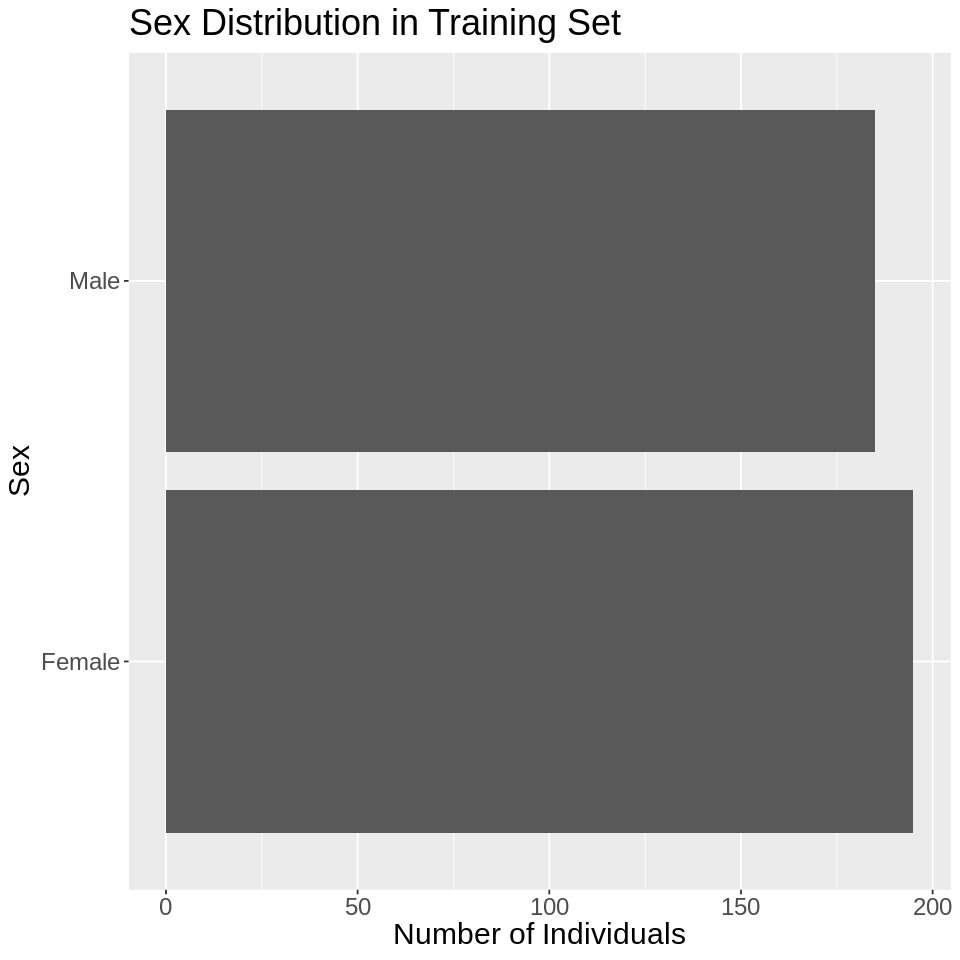

In [38]:
set.seed(514)

# Setting the Height & Width & of the Plot
options(repr.plot.width=8,repr.plot.height=8)

bm_gender_plot <- ggplot(sex_count, aes(x = count, y = sex)) +
    geom_bar(stat = "identity") +
labs(y ="Sex", x="Number of Individuals", title="Sex Distribution in Training Set")+
    theme(text = element_text(size = 18))
bm_gender_plot

> **Graph 1**: *This is a graph showing the gender distribution of the training data*

In [37]:
# Min and max of predictor variables
set.seed(114)
minmax_data <- bm_train |>
    group_by(sex) |>
    summarize(count = n(),
             max_height = max(hgt),
             max_age = max(age),
              max_wight = max(wgt),
            max_waist = max(wai_gi),
             max_chest = max(che_gi),
             max_shoulder = max(sho_gi),
             min_height = min(hgt),
             min_age = min(age),
             min_wight = min(wgt),
            min_waist = min(wai_gi),
             min_chest = min(che_gi),
             min_shoulder = min(sho_gi))
minmax_data

sex    count max_height max_age max_wight max_waist max_chest max_shoulder
1 Female 195   180.3      67      105.2     101.5     109.0     129.5       
2 Male   185   198.1      65      116.4     113.2     118.7     134.8       
  min_height min_age min_wight min_waist min_chest min_shoulder
1 147.2      18      42.0      57.9      72.6       85.9       
2 157.2      18      53.9      67.1      79.3      100.2

>**Table 3:** *The table represent maximum and minimum of Body Measure in Training data*

In [35]:
set.seed(4321)

# Mean of predictor variables
mean_data <- bm_train |>
    group_by(sex) |>
    summarize(count = n(),
             mean_height = mean(hgt),
             mean_age = mean(age),
              mean_wight = mean(wgt),
             mean_waist = mean(wai_gi),
             mean_chest = mean(che_gi),
             mean_shoulder = mean(sho_gi))
mean_data


sex    count mean_height mean_age mean_wight mean_waist mean_chest
1 Female 195   164.9769    28.62564 60.50718   69.92769    85.92359 
2 Male   185   177.9443    31.27568 78.65459   84.57730   100.85189 
  mean_shoulder
1 100.2949     
2 116.3643

> **Table 4:** *Mean Body Measure in Training data*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


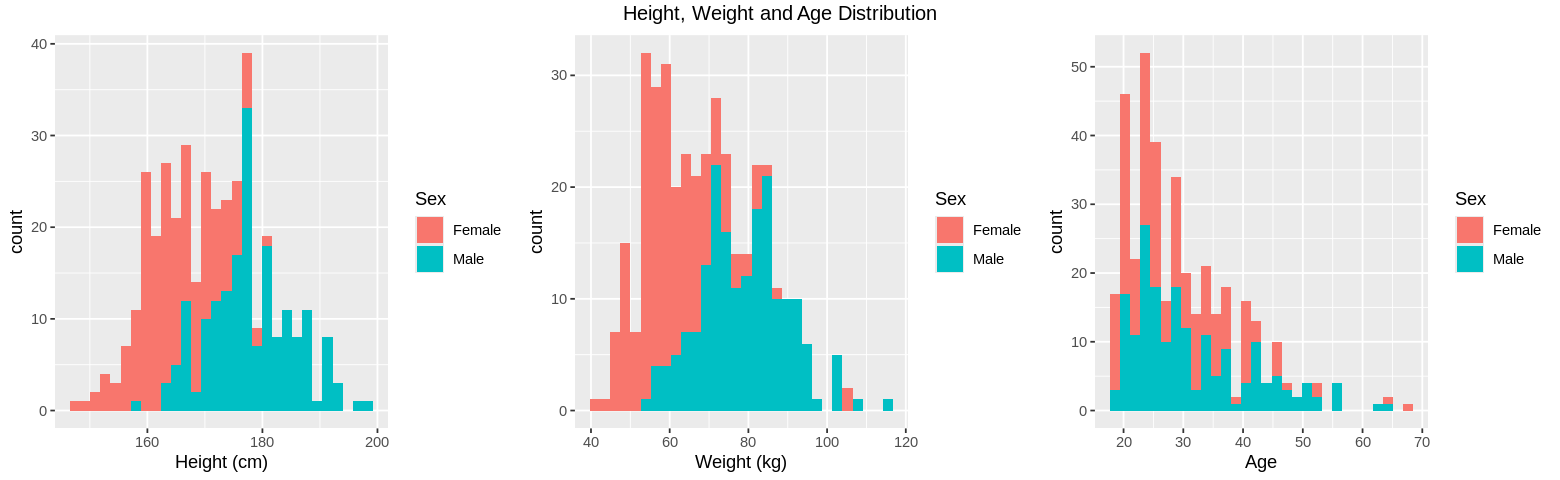

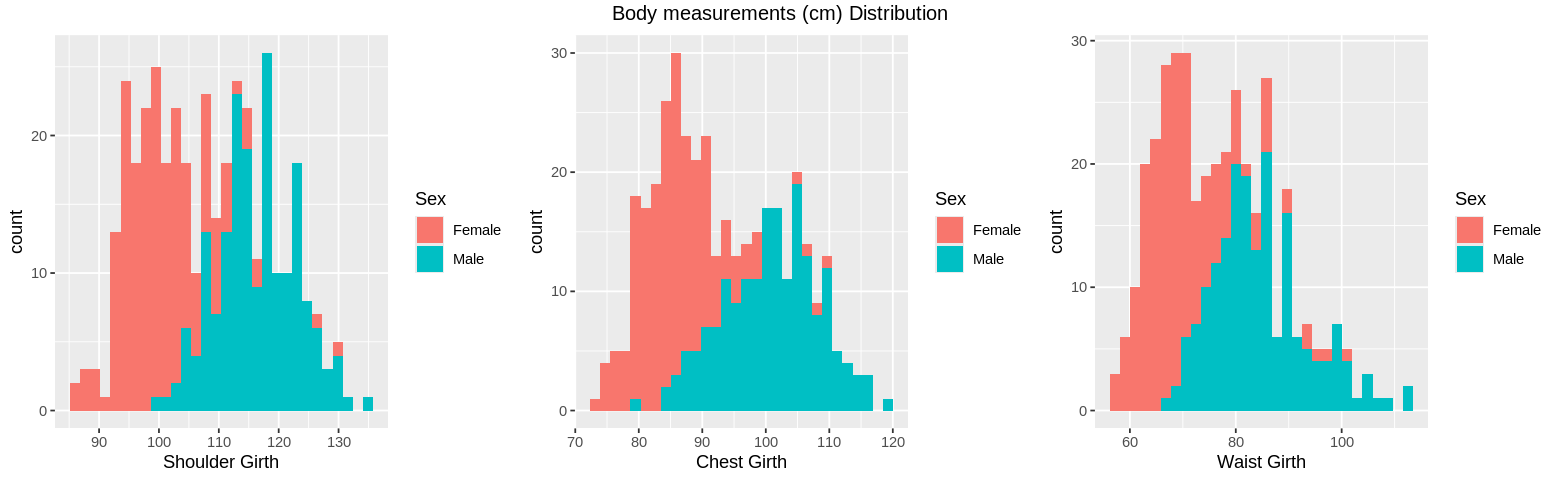

In [39]:
# Data visualisation - comparing the distributions of each of the predictor variables
options(repr.plot.width=13, repr.plot.height=4)
wgt_plot <- ggplot(bm_train, aes(x = wgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Weight (kg)', fill = 'Sex')
hgt_plot <- ggplot(bm_train, aes(x = hgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Height (cm)', fill = 'Sex')
age_plot <- ggplot(bm_train, aes(x = age, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Age', fill = 'Sex')
sho_plot <- ggplot(bm_train, aes(x = sho_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Shoulder Girth', fill = 'Sex')
che_plot <- ggplot(bm_train, aes(x = che_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Chest Girth', fill = 'Sex')
wai_plot <- ggplot(bm_train, aes(x = wai_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Waist Girth', fill = 'Sex')
grid.arrange(hgt_plot, wgt_plot, age_plot, nrow = 1, top = 'Height, Weight and Age Distribution')
grid.arrange(sho_plot, che_plot, wai_plot, nrow = 1, top = 'Body measurements (cm) Distribution')

> **Graph Set 1**: *The Graph set represent the Body Measure and count Data visualisation of Training data*. 
As can be seen from the graph set, the majority of our experimental sample were fully developed adults aged 20-40 years, with males being larger than females in all of the body measurements we used.

### Building and Training Classifier Model
To build the classifier, we used nearest_neighbor() function and cross validated it by tune(). Cross validation is very important as it helps us to determine the best K value for accurate analysis. Additionally, we made sure to scale all the necessary variables so that no single predictor would affect the distance calculation more than the others.
Additionally, we created 5 validation sets using the vfold() function and used this to test which parameter was best suited for prediction. With 5 folds, we can estimate the average accuracy. We chose 5 times because more than that would produce statistically insignificant results.
In addition, using more than 5 folds requires more computational power, which prevents our code from efficiently running a large number of rows in a large dataset. We found that using 3 or 4 neighbors yielded the highest accuracy. We also plotted a graph showing which mean represents the peak K-value to determine the best K-nearest neighbor.
By knowing the appropriate K-value, we were able to specify a classification model for the training data. In this way, we can eventually make predictions on the test data to configure the confusion matrix.

Analyzing these parameters helps us to distinguish the major differences between males and females with respect to these physical parameters. In addition, it helps us to determine the positive and negative relationships between the parameters.In order to start our classification process, we will first proceed with making a recipe using our training dataset and all the predictors mentioned above.

In [31]:
# Creating recipe
bm_recipe <- recipe(sex ~ wgt + hgt + sho_gi + che_gi + wai_gi, data = bm_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

Now, we use cross validation, which splits the training data set into 5 validation sets (5-fold cross validation), to find the ideal k value for the k-nearest-neighbor classification algorithm. Having a variety of training sets enables us to calculate the classification model's accuracy more precisely, which helps us identify the optimal k-neighbor.

In [42]:
# Set the seed.
set.seed(6542) 
# Setting up tuning model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from=1,to=10,by=1))

# Performing cross-validation 
bm_train_vfold <- vfold_cv(bm_train, v = 5, strata = sex)

vfold_metrics <- workflow() |>
                    add_recipe(bm_recipe) |>
                    add_model(knn_spec) |>
                    tune_grid(resamples = bm_train_vfold, grid=k_vals) |>
                    collect_metrics()

accuracies <- vfold_metrics |> filter(.metric=="accuracy")


head(accuracies)


neighbors .metric  .estimator mean      n std_err     .config              
1 1         accuracy binary     0.9078947 5 0.015002308 Preprocessor1_Model01
2 2         accuracy binary     0.9078947 5 0.015002308 Preprocessor1_Model02
3 3         accuracy binary     0.9131579 5 0.008924118 Preprocessor1_Model03
4 4         accuracy binary     0.9131579 5 0.008924118 Preprocessor1_Model04
5 5         accuracy binary     0.9052632 5 0.017848237 Preprocessor1_Model05
6 6         accuracy binary     0.9052632 5 0.017848237 Preprocessor1_Model06

> **Table 5:** *The table represent the First 6 row of Accuracy Table of K*

In [43]:
set.seed(3456)  



# Finding the number of neighbors that yields the highest accuracy (mean)
k_max <- accuracies|>
    arrange(desc(mean)) |>
    slice(1)
k_max



neighbors .metric  .estimator mean      n std_err     .config              
1 3         accuracy binary     0.9131579 5 0.008924118 Preprocessor1_Model03

> **Table 6:** *The table represent the most accurate K neighbor value*

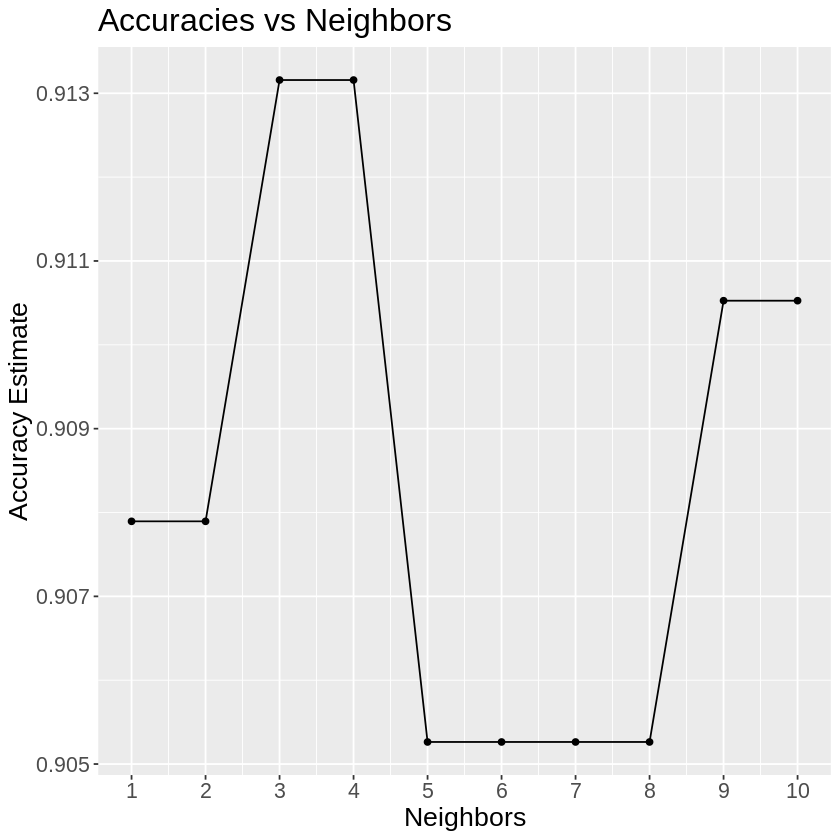

In [45]:
# Plotting accuracy against neighbors
options(repr.plot.width = 7, repr.plot.height = 7)
accuracies_vs_k  <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       ggtitle('Accuracies vs Neighbors') +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, 1)) + 
       theme(text = element_text(size = 16))
accuracies_vs_k

>**Graph 2：** The Graph Represent a relation Graph of accuracy against neighbors, which can see that 3 and 4 are the most accurate K value 

According to the above accuracy vs k-neighbors line plot, we observe that the curve peaks at k = 3,4. This tells us that our classification model would be the most accurate if we choose k = 3 or k = 4. As a result, we retrained the training dataset with a neighbor of k= 3 because 3 has the highest accuracy according to Table 6.

In [46]:
library(yardstick)

# Set the seed. Don't remove this!
set.seed(9999) 

#recreating spec with best K
bm_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
            set_engine("kknn") |>
            set_mode("classification")

#recreating the model with the new recipe
bm_fit <- workflow() |>
          add_recipe(bm_recipe) |>
          add_model(bm_spec) |>
          fit(data=bm_test)

#predicting the results of wine_test data
bm_test_predictions <- predict(bm_fit, bm_test) |>
                       bind_cols(bm_test)

We can confirm the accuracy of the prediction results using metrics. We can also see the table of how many points were actually predicted correctly according to sex using a Confusion Matrix.

In [40]:
# filtering the accuracy by comparing the predicted and truth column
bm_test_predictions$sex <- as.factor(bm_test_predictions$sex)
bm_test_predictions |> metrics(truth=sex, estimate=.pred_class) |> filter(.metric == "accuracy")

.metric  .estimator .estimate
1 accuracy binary     0.9212598

> **Table 6:** *The table represent the accuracy result after comparing the predicted and truth column*

In [41]:
bm_matrix <- bm_test_predictions |>
    conf_mat(truth = sex, estimate = .pred_class)

bm_matrix

          Truth
Prediction Female Male
    Female     59    4
    Male        6   58

From both the accuracy metrics and the confusion matrix, we can observe that the majority of the data points were predicted accurately. The incorrect predictions were roughly equal for both the categories of sex. Overall, the model demonstrated an accuracy of 92.1%, which is a reflection of the success and usefulness of our classification model.

Now, we can visualise the relation between our predictors by comparing the predicted and truth value from our predictions.

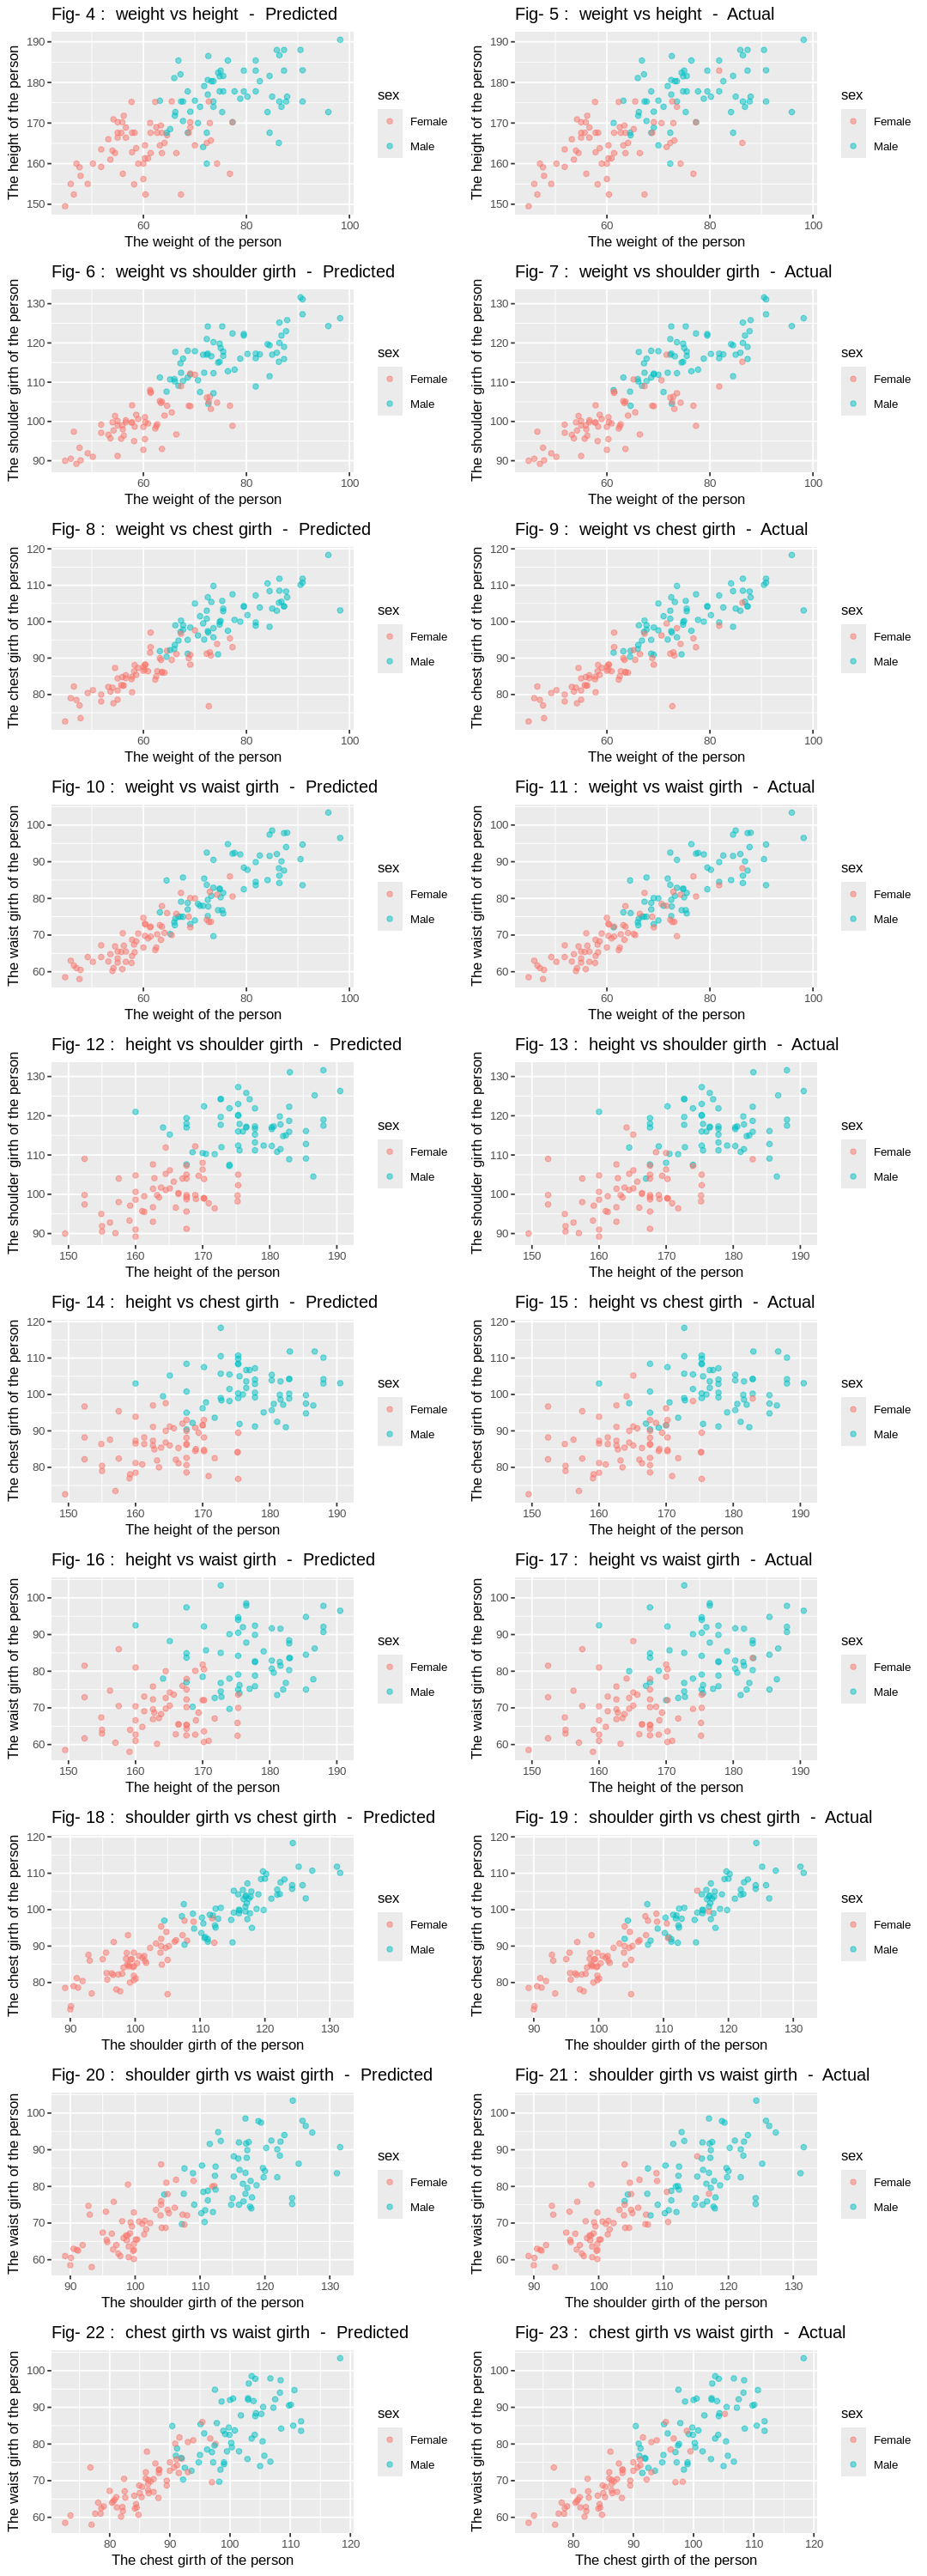

In [54]:
## Setting the Width & Height of the Plot
options(repr.plot.width=9,repr.plot.height=25)

# Function to create scatter plots for variable pairs
create_scatter_plot <- function(data, x_var, y_var, color_var, title_suffix, fig_number, x_name, y_name) {
  plot <- ggplot(data, aes_string(x = x_var, y = y_var, color = color_var)) +
    geom_point(alpha = 0.5) +
    labs(x = paste("The", x_name, "of the person"),
         y = paste("The", y_name, "of the person"),
         color = "sex") +
    theme(text = element_text(size = 10)) +
    ggtitle(paste("Fig-", fig_number, ": ", x_name, "vs", y_name, " - ", title_suffix))
  
  return(plot)
}

# Variables to create scatter plots for
variables <- c("wgt", "hgt", "sho_gi", "che_gi", "wai_gi")
# Names for the labs
names <- c("weight", "height", "shoulder girth", "chest girth", "waist girth")

# Empty list to store plots
plot_list <- list()
plot_number <- 3 # Starting plot number

# Loop through to make the plots
for (i in 1:(length(variables) - 1)) {
  for (j in (i + 1):length(variables)) {
    # Create plot with predicted sex
    plot_number <- plot_number + 1
    plot_list[[length(plot_list) + 1]] <- create_scatter_plot(bm_test_predictions, 
                                                              variables[i], variables[j], 
                                                              ".pred_class", "Predicted", plot_number, 
                                                              names[i], names[j])
    
    # Create plot with actual sex
    plot_number <- plot_number + 1
    plot_list[[length(plot_list) + 1]] <- create_scatter_plot(bm_test_predictions, 
                                                              variables[i], variables[j], 
                                                              "sex", "Actual", plot_number, 
                                                              names[i], names[j])
  }
}

plot_grid(plotlist = plot_list, ncol = 2)

> **Graph Set 2：** This Graph Set Represent relation between our predictors. In the above visualtions, we can see how all our predictors are related to our truth and predicted value. By comparing both the adjacent graphs of predicted and actual values, we can observe very high similarity which reflects the accuracy of our classification model across all predictors.

## Discussion:
<br>summarize what you found
<br>discuss whether this is what you expected to find?
<br>discuss what impact could such findings have?
<br>discuss what future questions could this lead to?

### Summary of findings:
In this project, we documented our procedures for establishing a classification model for predicting a person's sex based on different body measurements. We implemented 5-fold cross-validation in the decision of the optimal neighbor for the KNN-classification model, trained a classifier based on our pre-obtained training dataset with our optimal k-value of 3, and conducted an accuracy test by inputting testing datasets. The resulting accuracy of 92.1% suggests that our model could be a valuable tool in decision-making processes related to determining an unknown person's sex.

### Expectations and Impact:
Our objective was to construct a classification model capable of predicting the sex of a person with reasonable accuracy.  Our results align with the expectations set during the project. We used different body measurements from our dataset to construct our model and the model's accuracy met the anticipated standards. This aligns with the assumption that these measurements play a significant role in determining the sex of a person.

Our exploration of the dataset and subsequent KNN classification yielded promising results. The model's accuracy indicates its potential usefulness in predicting one's sex. These results can be used in an array of fields including medicine and forensics in order to assist people in these fields with their work. An example could be identifying a dead body in forensics where the sex of the person may not be obvoius but could be deduced with the body measurements of the corpse. 

### Drawbacks and Questions:
While an accuracy of 92.1% is significant, it is essential to acknowledge potential limitations and scrutinize the model's performance further. A potential weakness of our classification model is that body measurements of people across the globe vary a lot depending on genes and other demographic factors. This might mean that our model could be biased towards people belonging to the region of the people in our training dataset. The results might be incorrect if we try to predict the sex of a person belonging to a different part of the globe. We tried to tackle this problem by looking for a dataset with a wide variety of people in it, but the model could still be improved much more if given a better range of data.

The analysis also leads to further questions, including:

1) Are there any other factors that are more influential to a person's sex that the model has not considered?
2) How can we incorporate this variability in body types across the globe into our model to make it more universal?

### References

BEHNKE, A. R. (1959). THE ESTIMATION OF LEAN BODY WEIGHT FROM “SKELETAL” MEASUREMENTS. Human Biology, 31(4), 295–315. http://www.jstor.org/stable/4144840<br>3

It describes that consistent measurements converted to a common denominator in terms of the body radius were compiled for both a Reference Man and a Reference Woman and complementary relationships were revealed for upper and lower
trunk, and upper and lower extremity measurements of men and women. They are relevant to our group project.<br> 




Heinz, G., Peterson, L. J., Johnson, R. W., & Kerk, C. J. (2003). Exploring relationships in body dimensions. Journal of Statistics Education, 11(2)https://doi.org/10.1080/10691898.2003<br>.11910711

The Study investigated the relationship between body build, weight, and girths in physically active young men and women. The dataset in the article allows students to explore anthropometric, forensic, and ergonomic topics using a variety of data analysis techniques. Descriptions of the measurements and some suggested analyses are provided in this article, which are suitable for us to use in our group project.
